In [25]:
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [26]:
imageType = "eps"

In [27]:
aggregated_results_path = os.path.join(os.getcwd(), "results", "aggregated.csv")
aggregated_results_df = pd.read_csv(aggregated_results_path)

In [28]:
different_transaction_data = aggregated_results_df[aggregated_results_df['used_cache'] == False]
different_transaction_data

,cipher,cipher_type,number_transactions,used_cache,block_size,mean,std,n_tests,distribution,mean_block_time,dist_block_time,shapiro-wilk p-value,normaltest p-value
0,dilithium,Dilithium3,100,False,9.0,250.314588,68.400823,10,30 296.25233\n31 306.98655\n32 172.32...,22.397659,"[[23.05918002128601, 12.601809978485107, 16.41...",0.617340,NaN
1,dilithium,Dilithium3,1000,False,9.0,4248.114939,451.429208,20,50 4652.32643\n51 3538.40353\n52 3...,38.083718,"[[30.3854398727417, 11.92204999923706, 9.95307...",0.250861,0.168972
12,dilithium,Dilithium3,500,False,9.0,1640.253414,171.146777,20,0 1953.76100\n1 1736.05934\n2 1819...,29.531294,"[[16.21715998649597, 27.68508005142212, 5.2421...",0.894035,0.820735
13,dilithium,Dilithium3,2000,False,9.0,13344.115224,871.479503,10,60 12227.45667\n61 12782.53263\n62 13...,59.929108,"[[48.57047748565674, 44.6565899848938, 63.4905...",0.281874,NaN
14,rsa,3072,100,False,9.0,113.791537,33.121666,20,100 88.26259\n101 121.47676\n102 73...,10.376015,"[[16.090110063552856, 10.499399900436401, 22.2...",0.200293,0.453697
15,rsa,3072,1000,False,9.0,2031.538670,128.029996,20,120 2072.29842\n121 1837.02733\n122 2...,18.271836,"[[9.917289972305298, 27.14130997657776, 24.723...",0.108779,0.081811
26,rsa,3072,500,False,9.0,656.118095,55.238367,20,20 599.43303\n21 692.46152\n22 733...,11.899350,"[[10.248400211334229, 4.7893898487091064, 12.6...",0.376604,0.237860
27,rsa,3072,2000,False,9.0,6564.226924,376.456677,10,130 6549.56268\n131 6552.53892\n132 7...,29.479550,"[[43.25508999824524, 0.10242986679077148, 3.13...",0.105676,NaN
28,ecc,P-256,100,False,9.0,90.703344,22.679151,10,70 121.08510\n71 66.19690\n72 110.11...,9.594316,"[[33.4613561630249, 1.212980031967163, 12.0991...",0.231012,NaN
29,ecc,P-256,1000,False,9.0,1671.530043,103.337547,20,90 1715.89657\n91 1664.67058\n92 1...,15.093342,"[[35.287784814834595, 16.057729959487915, 12.0...",0.156306,0.422836


In [29]:
different_transaction_x = different_transaction_data["number_transactions"].unique()
different_transaction_cipher = set(different_transaction_data["cipher"].unique())
different_transaction_x.sort()
different_transaction_x

array([ 100,  500, 1000, 2000])

In [30]:
cipher_to_name = {}
cipher_to_name['rsa'] = "RSA 3072"
cipher_to_name['dilithium'] = "Dilithium 3"
cipher_to_name['ecc'] = "ECC P-256"

In [31]:
different_transaction_y = {}
for cipher in different_transaction_cipher:
    different_transaction_y[cipher] = different_transaction_data[different_transaction_data['cipher'] == cipher].sort_values(by=['number_transactions']).round()['mean'].to_list()
    print(cipher, different_transaction_data[different_transaction_data['cipher'] == cipher].sort_values(by=['number_transactions']).round(decimals=2)['shapiro-wilk p-value'].to_list())
different_transaction_y

dilithium [0.62, 0.89, 0.25, 0.28]
rsa [0.2, 0.38, 0.11, 0.11]
ecc [0.23, 0.39, 0.16, 0.75]


{'dilithium': [250.0, 1640.0, 4248.0, 13344.0],
 'rsa': [114.0, 656.0, 2032.0, 6564.0],
 'ecc': [91.0, 561.0, 1672.0, 6700.0]}

/var/folders/bb/5ngw7fxn22lb__4rv0sc3phw0000gn/T/ipykernel_56320/3019868952.py:20: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0, max(max(different_transaction_y.values()))+ 25000)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


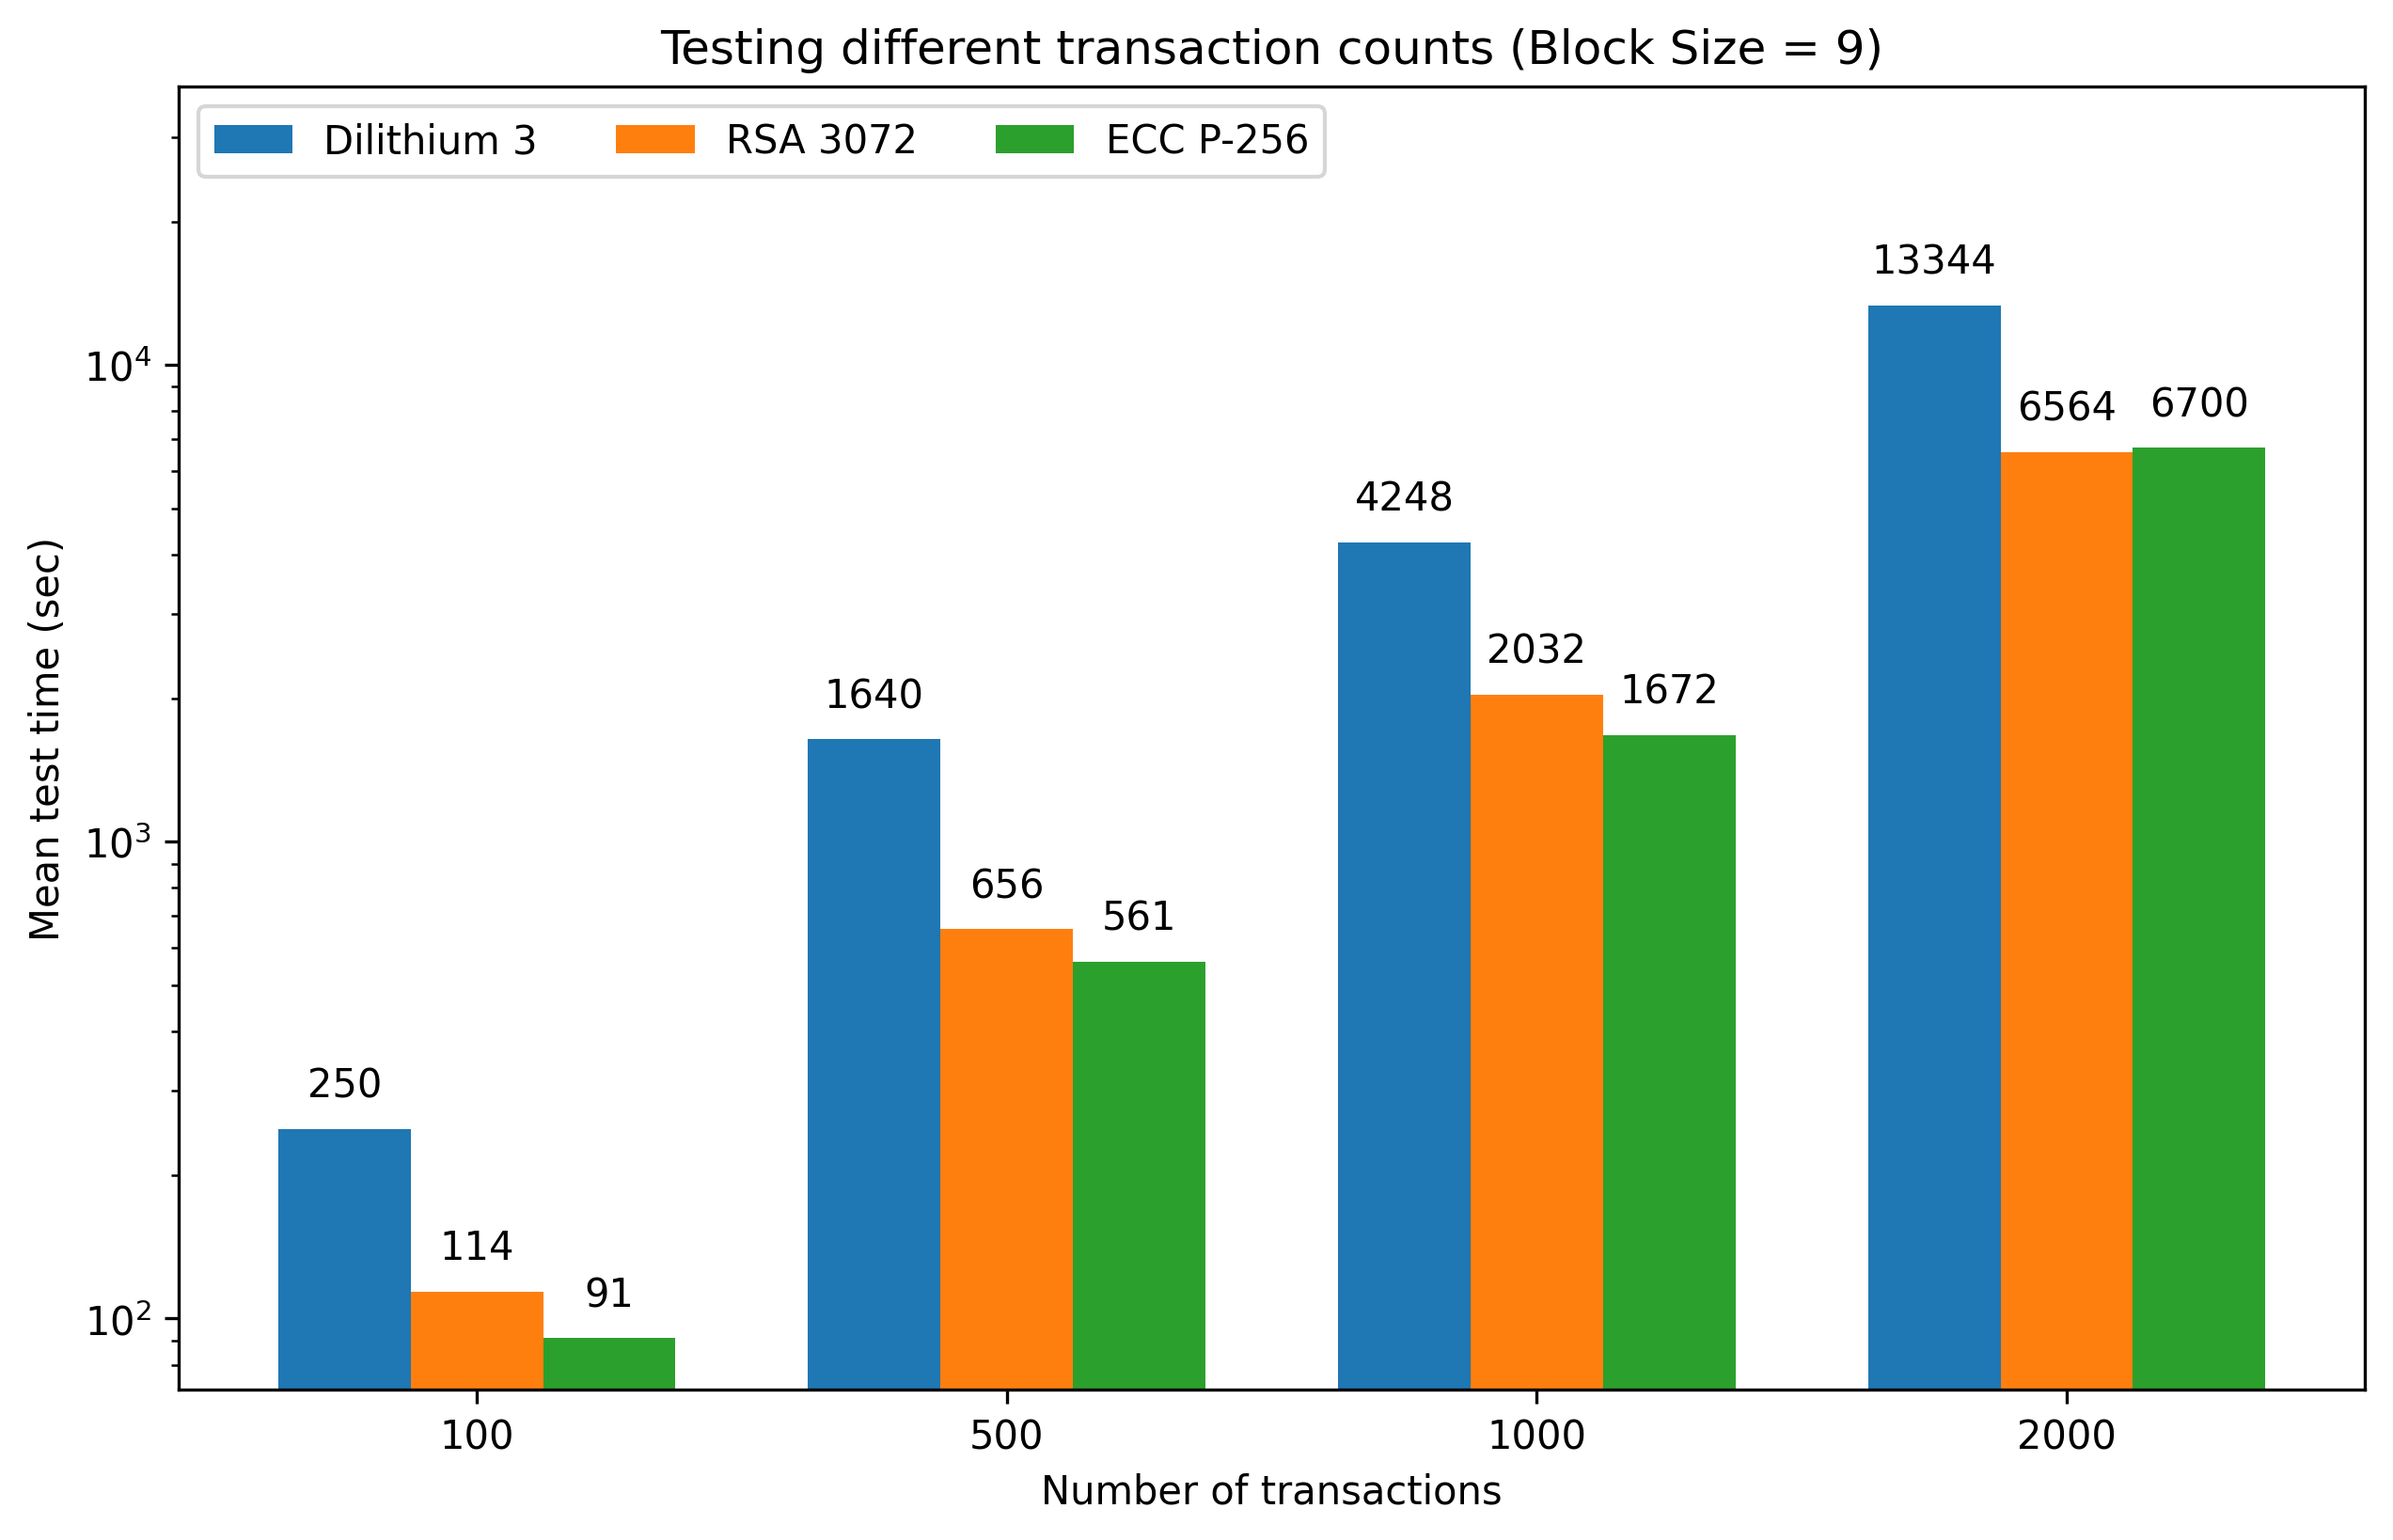

In [32]:
x = np.arange(len(different_transaction_x)) # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(10, 6), dpi=300)

for cipher, y in different_transaction_y.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, y, width, label=cipher_to_name[cipher])
    ax.bar_label(rects, padding=6)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mean test time (sec)')
ax.set_yscale('log')
ax.set_xlabel('Number of transactions')
ax.set_title('Testing different transaction counts (Block Size = 9)')
ax.set_xticks(x + width, different_transaction_x)
ax.legend(loc='upper left', ncols=4)
ax.set_ylim(0, max(max(different_transaction_y.values()))+ 25000)
"""
ax.annotate("",
            xy=(1, 1670), xycoords='data',
            xytext=(0, 340), textcoords='data',
            arrowprops=dict(arrowstyle="->", facecolor="red", connectionstyle="angle3"))
"""
#plt.show()
figname = os.path.join(os.getcwd(), "results", "different_transactions." + imageType )
plt.savefig(figname, format=imageType)

In [33]:
different_block_sizes_data = aggregated_results_df[aggregated_results_df['used_cache'] == True]

In [34]:
different_block_sizes_x = different_block_sizes_data["block_size"].unique()
different_block_sizes_x.sort()
different_block_sizes_x

array([ 9., 19., 29., 39., 49., 59., 69., 79., 89., 99.])

In [35]:
different_block_sizes_y = {}
for cipher in different_transaction_cipher:
    different_block_sizes_y[cipher] = different_block_sizes_data[different_block_sizes_data['cipher'] == cipher].sort_values(by=['block_size']).round()['mean'].to_list()
    print(cipher, different_block_sizes_data[different_block_sizes_data['cipher'] == cipher].sort_values(by=['block_size']).round()['std'].to_list())
different_block_sizes_y

dilithium [308.0, 412.0, 383.0, 538.0, 585.0, 485.0, 608.0, 714.0, 543.0, 877.0]
rsa [83.0, 117.0, 176.0, 177.0, 75.0, 99.0, 110.0, 123.0, 111.0, 152.0]
ecc [99.0, 66.0, 96.0, 45.0, 48.0, 57.0, 45.0, 50.0, 55.0, 70.0]


{'dilithium': [4349.0,
  3220.0,
  2874.0,
  2680.0,
  2682.0,
  1988.0,
  2572.0,
  2637.0,
  1856.0,
  2606.0],
 'rsa': [1929.0,
  1141.0,
  919.0,
  760.0,
  598.0,
  675.0,
  581.0,
  632.0,
  663.0,
  606.0],
 'ecc': [1644.0,
  787.0,
  610.0,
  473.0,
  384.0,
  353.0,
  315.0,
  308.0,
  306.0,
  290.0]}

In [36]:
c = 'dilithium'
l = different_block_sizes_y[c]
first = l[0]
last = l[len(l)-1]
print(first, last)
(last-first)/first

4349.0 2606.0


-0.4007817889169924

/var/folders/bb/5ngw7fxn22lb__4rv0sc3phw0000gn/T/ipykernel_56320/2080819929.py:20: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0, max(max(different_block_sizes_y.values()))+ 25000)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


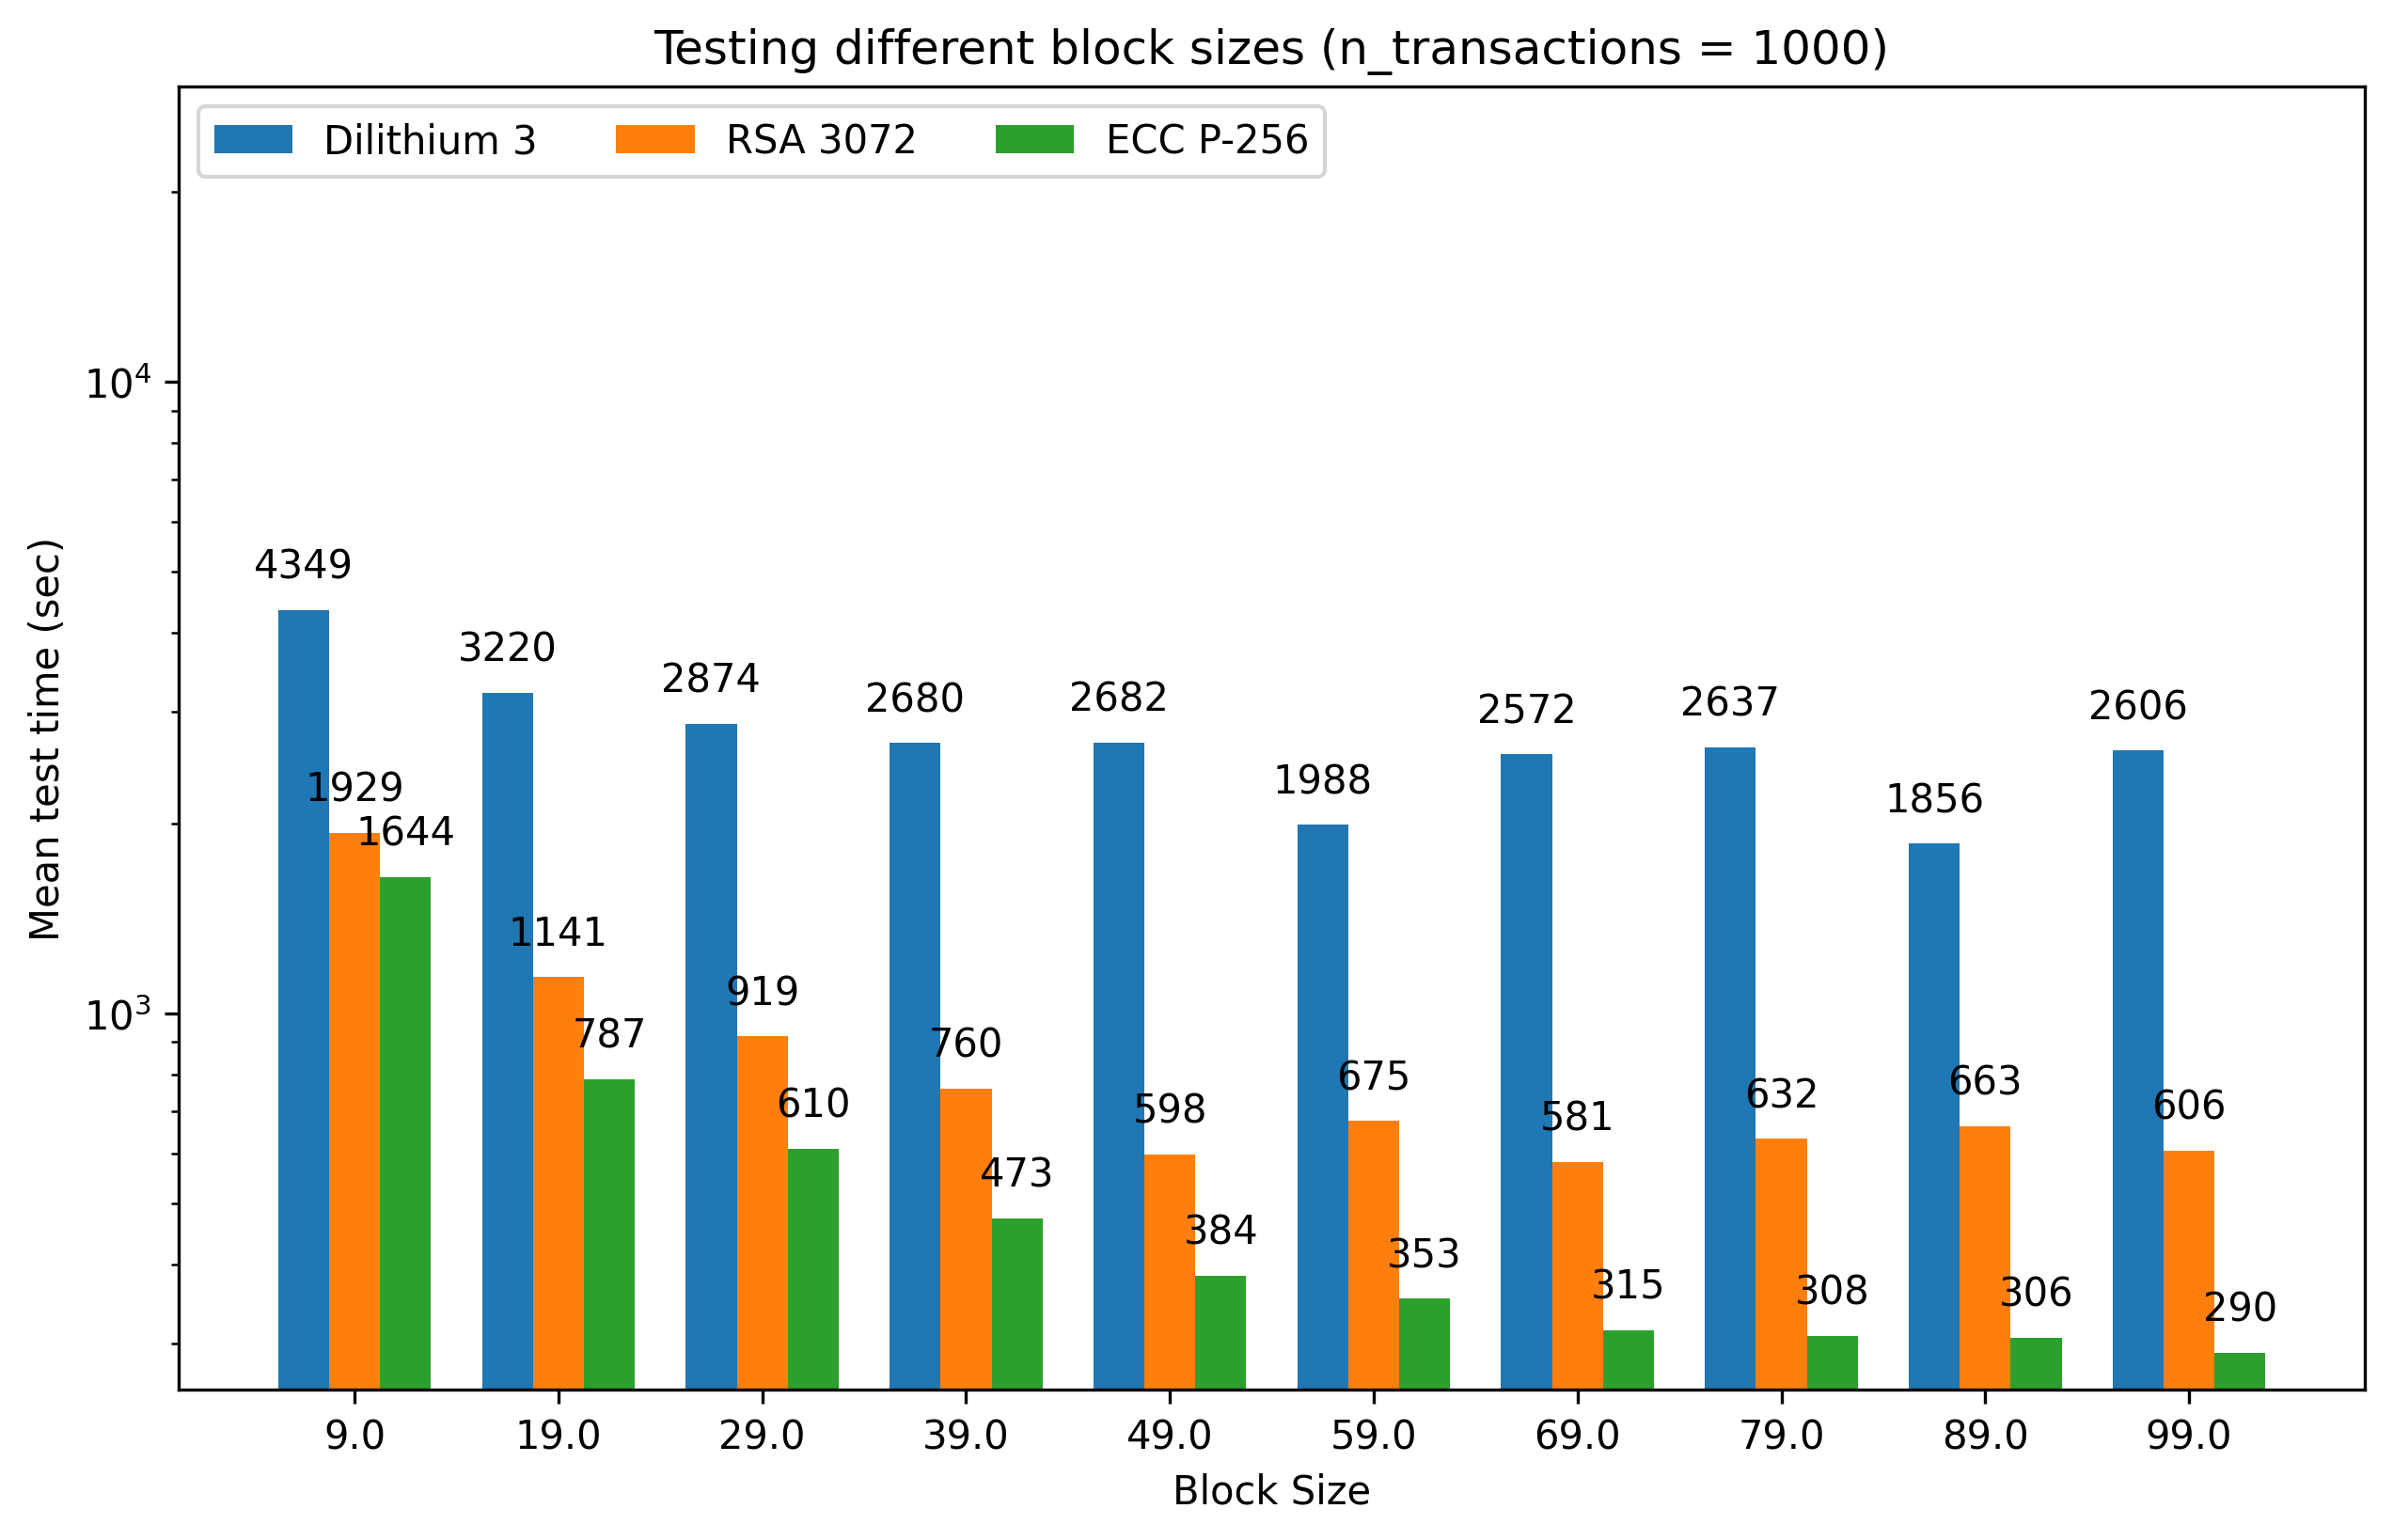

In [37]:
x = np.arange(len(different_block_sizes_x)) # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(10, 6), dpi=300)

for cipher, y in different_block_sizes_y.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, y, width, label=cipher_to_name[cipher])
    ax.bar_label(rects, padding=6)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mean test time (sec)')
ax.set_yscale('log')
ax.set_xlabel('Block Size')
ax.set_title('Testing different block sizes (n_transactions = 1000)')
ax.set_xticks(x + width, different_block_sizes_x)
ax.legend(loc='upper left', ncols=4)
ax.set_ylim(0, max(max(different_block_sizes_y.values()))+ 25000)

figname = os.path.join(os.getcwd(), "results", "different_block_sizes_test_time_bar."+imageType)
plt.savefig(figname, format=imageType)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


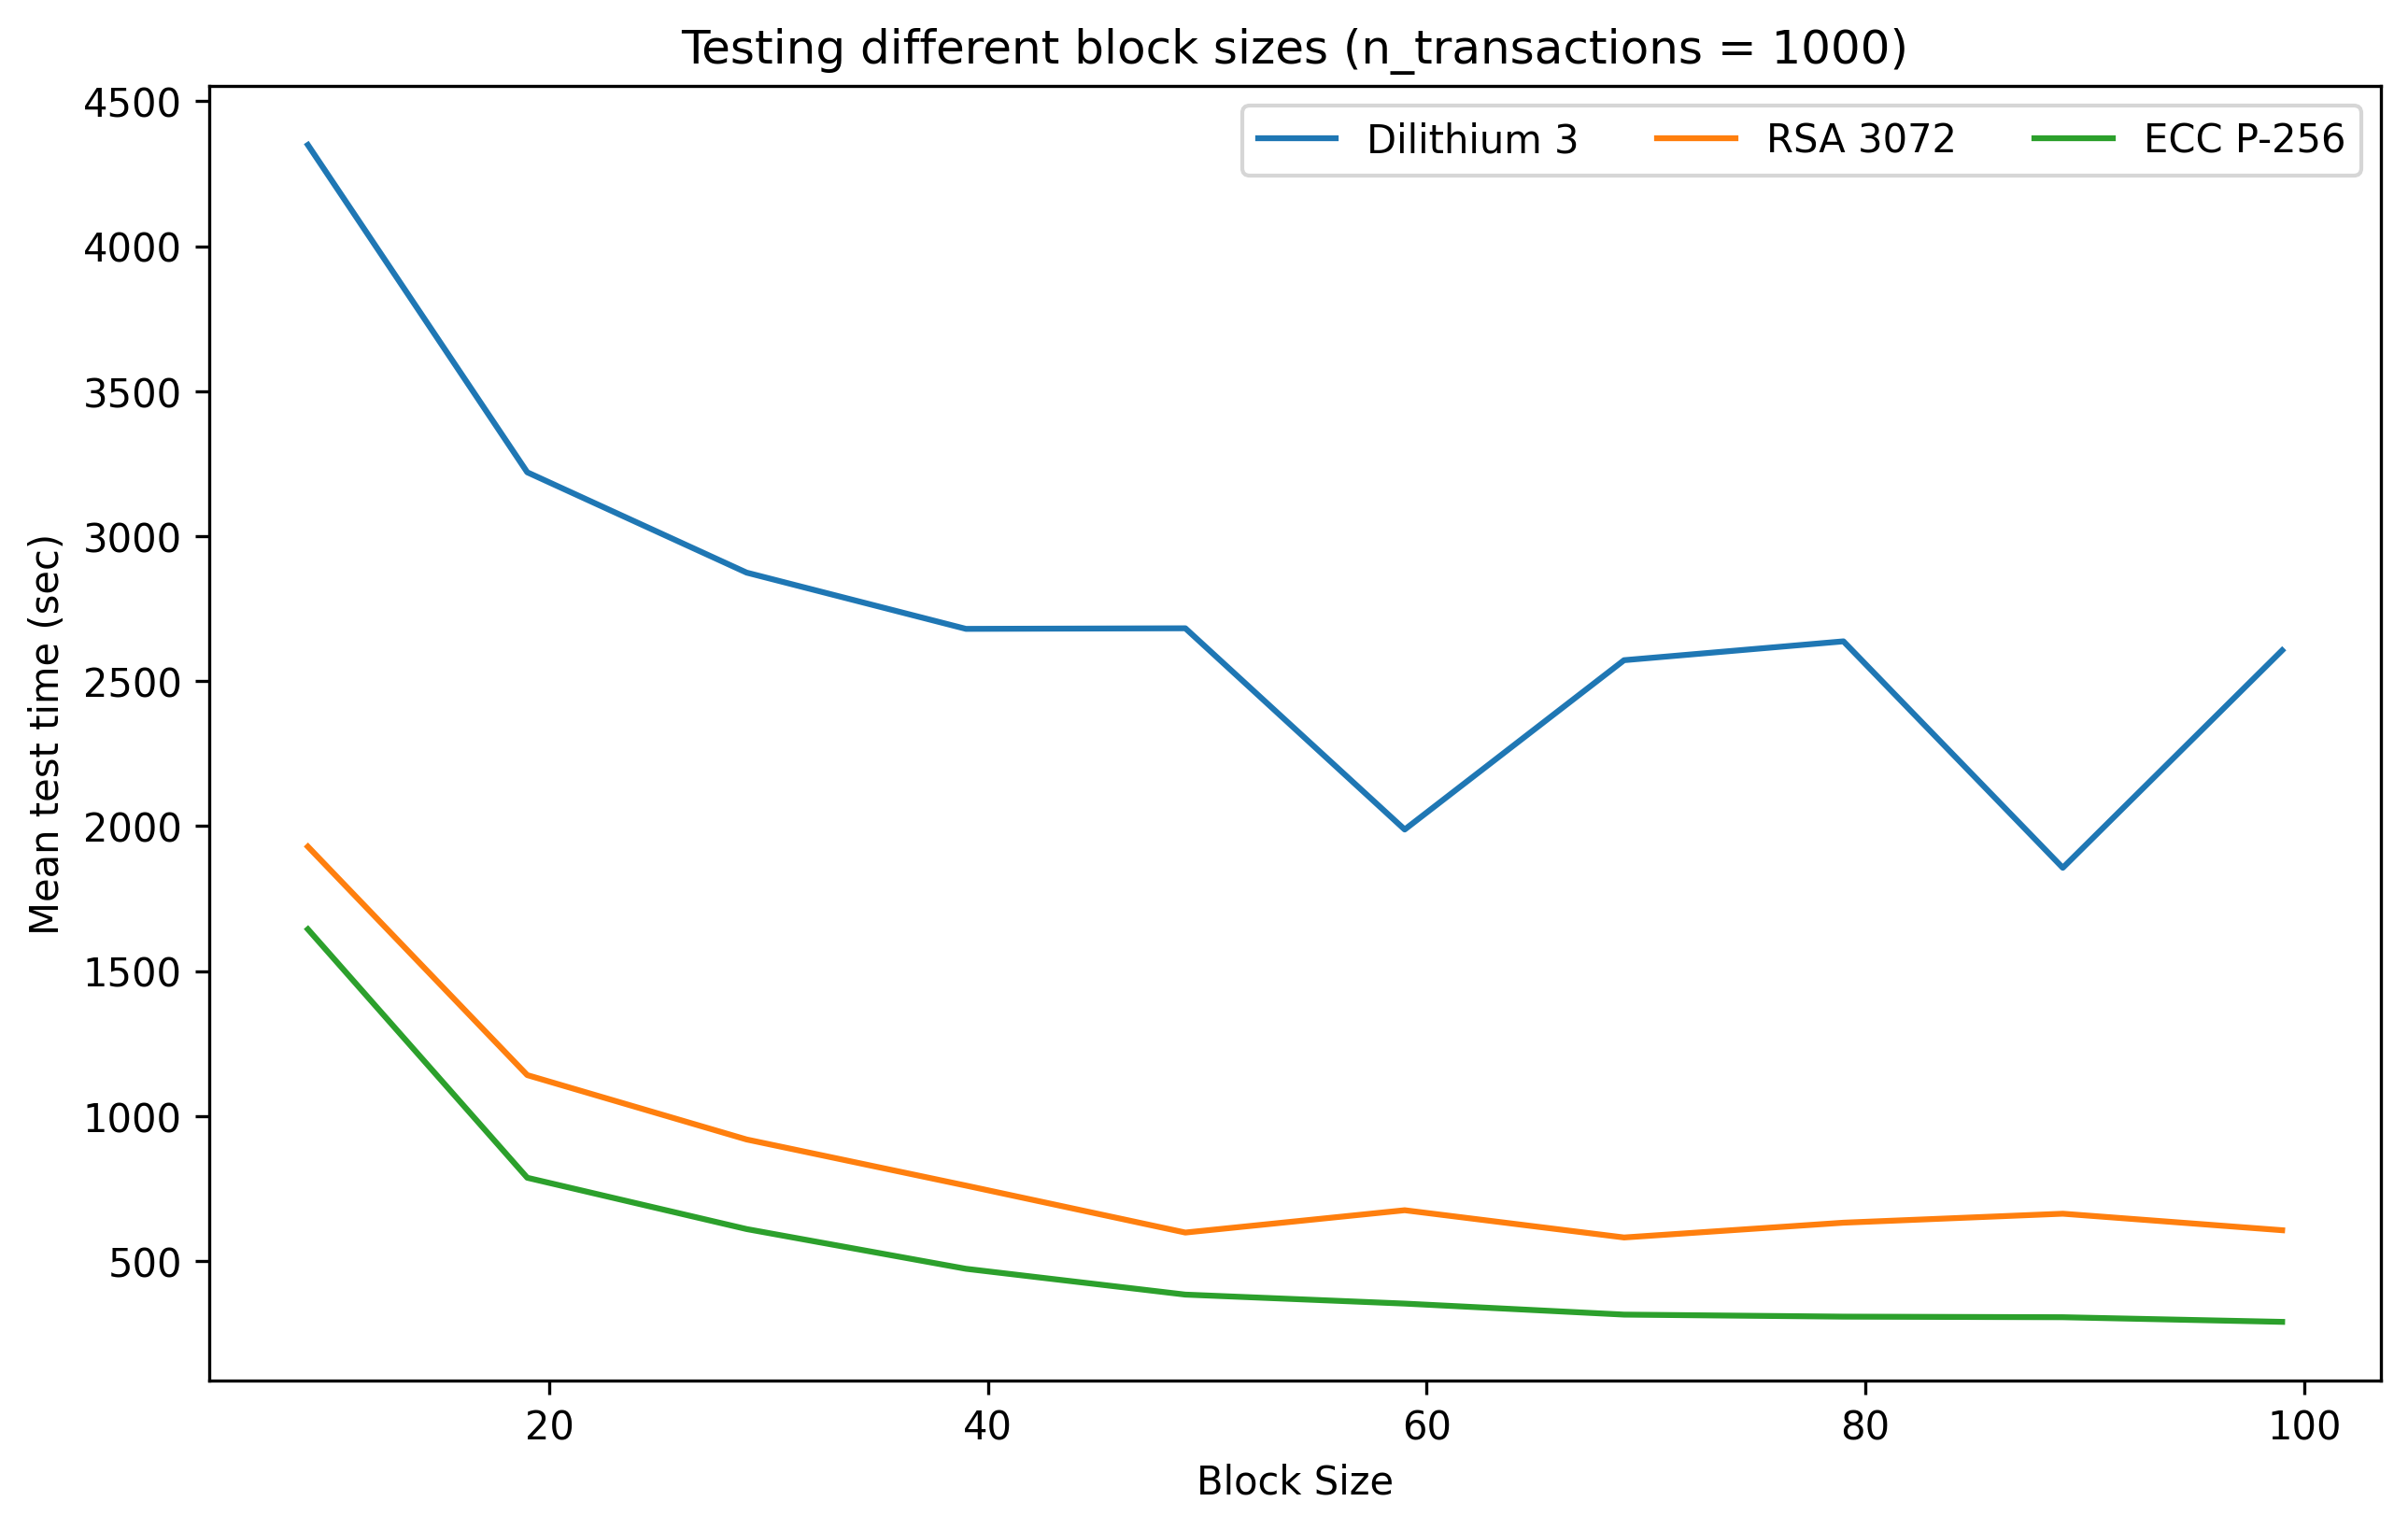

In [38]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)

for cipher, y in different_block_sizes_y.items():
    ax.plot(different_block_sizes_x, y, label=cipher_to_name[cipher])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mean test time (sec)')
#ax.set_yscale('log')
ax.set_xlabel('Block Size')
ax.set_title('Testing different block sizes (n_transactions = 1000)')
#ax.set_xticks(x + width, different_block_sizes_x)
ax.legend(loc='upper right', ncols=4)
#ax.set_ylim(0, max(max(different_block_sizes_y.values()))+ 25000)

figname = os.path.join(os.getcwd(), "results", "different_block_sizes_test_time_line."+imageType)
plt.savefig(figname, format=imageType)

In [39]:
different_block_sizes_y2 = {}
for cipher in different_transaction_cipher:
    different_block_sizes_y2[cipher] = different_block_sizes_data[different_block_sizes_data['cipher'] == cipher].sort_values(by=['block_size']).round()['mean_block_time'].to_list()
different_block_sizes_y2

{'dilithium': [39.0,
  61.0,
  82.0,
  103.0,
  128.0,
  117.0,
  172.0,
  203.0,
  156.0,
  238.0],
 'rsa': [17.0, 22.0, 26.0, 29.0, 28.0, 38.0, 35.0, 46.0, 53.0, 51.0],
 'ecc': [15.0, 15.0, 18.0, 19.0, 19.0, 21.0, 21.0, 23.0, 26.0, 26.0]}

In [43]:
c = 'ecc'
l = different_block_sizes_y2[c]
first = l[0]
last = l[len(l)-1]
(last-first)/first

0.7333333333333333

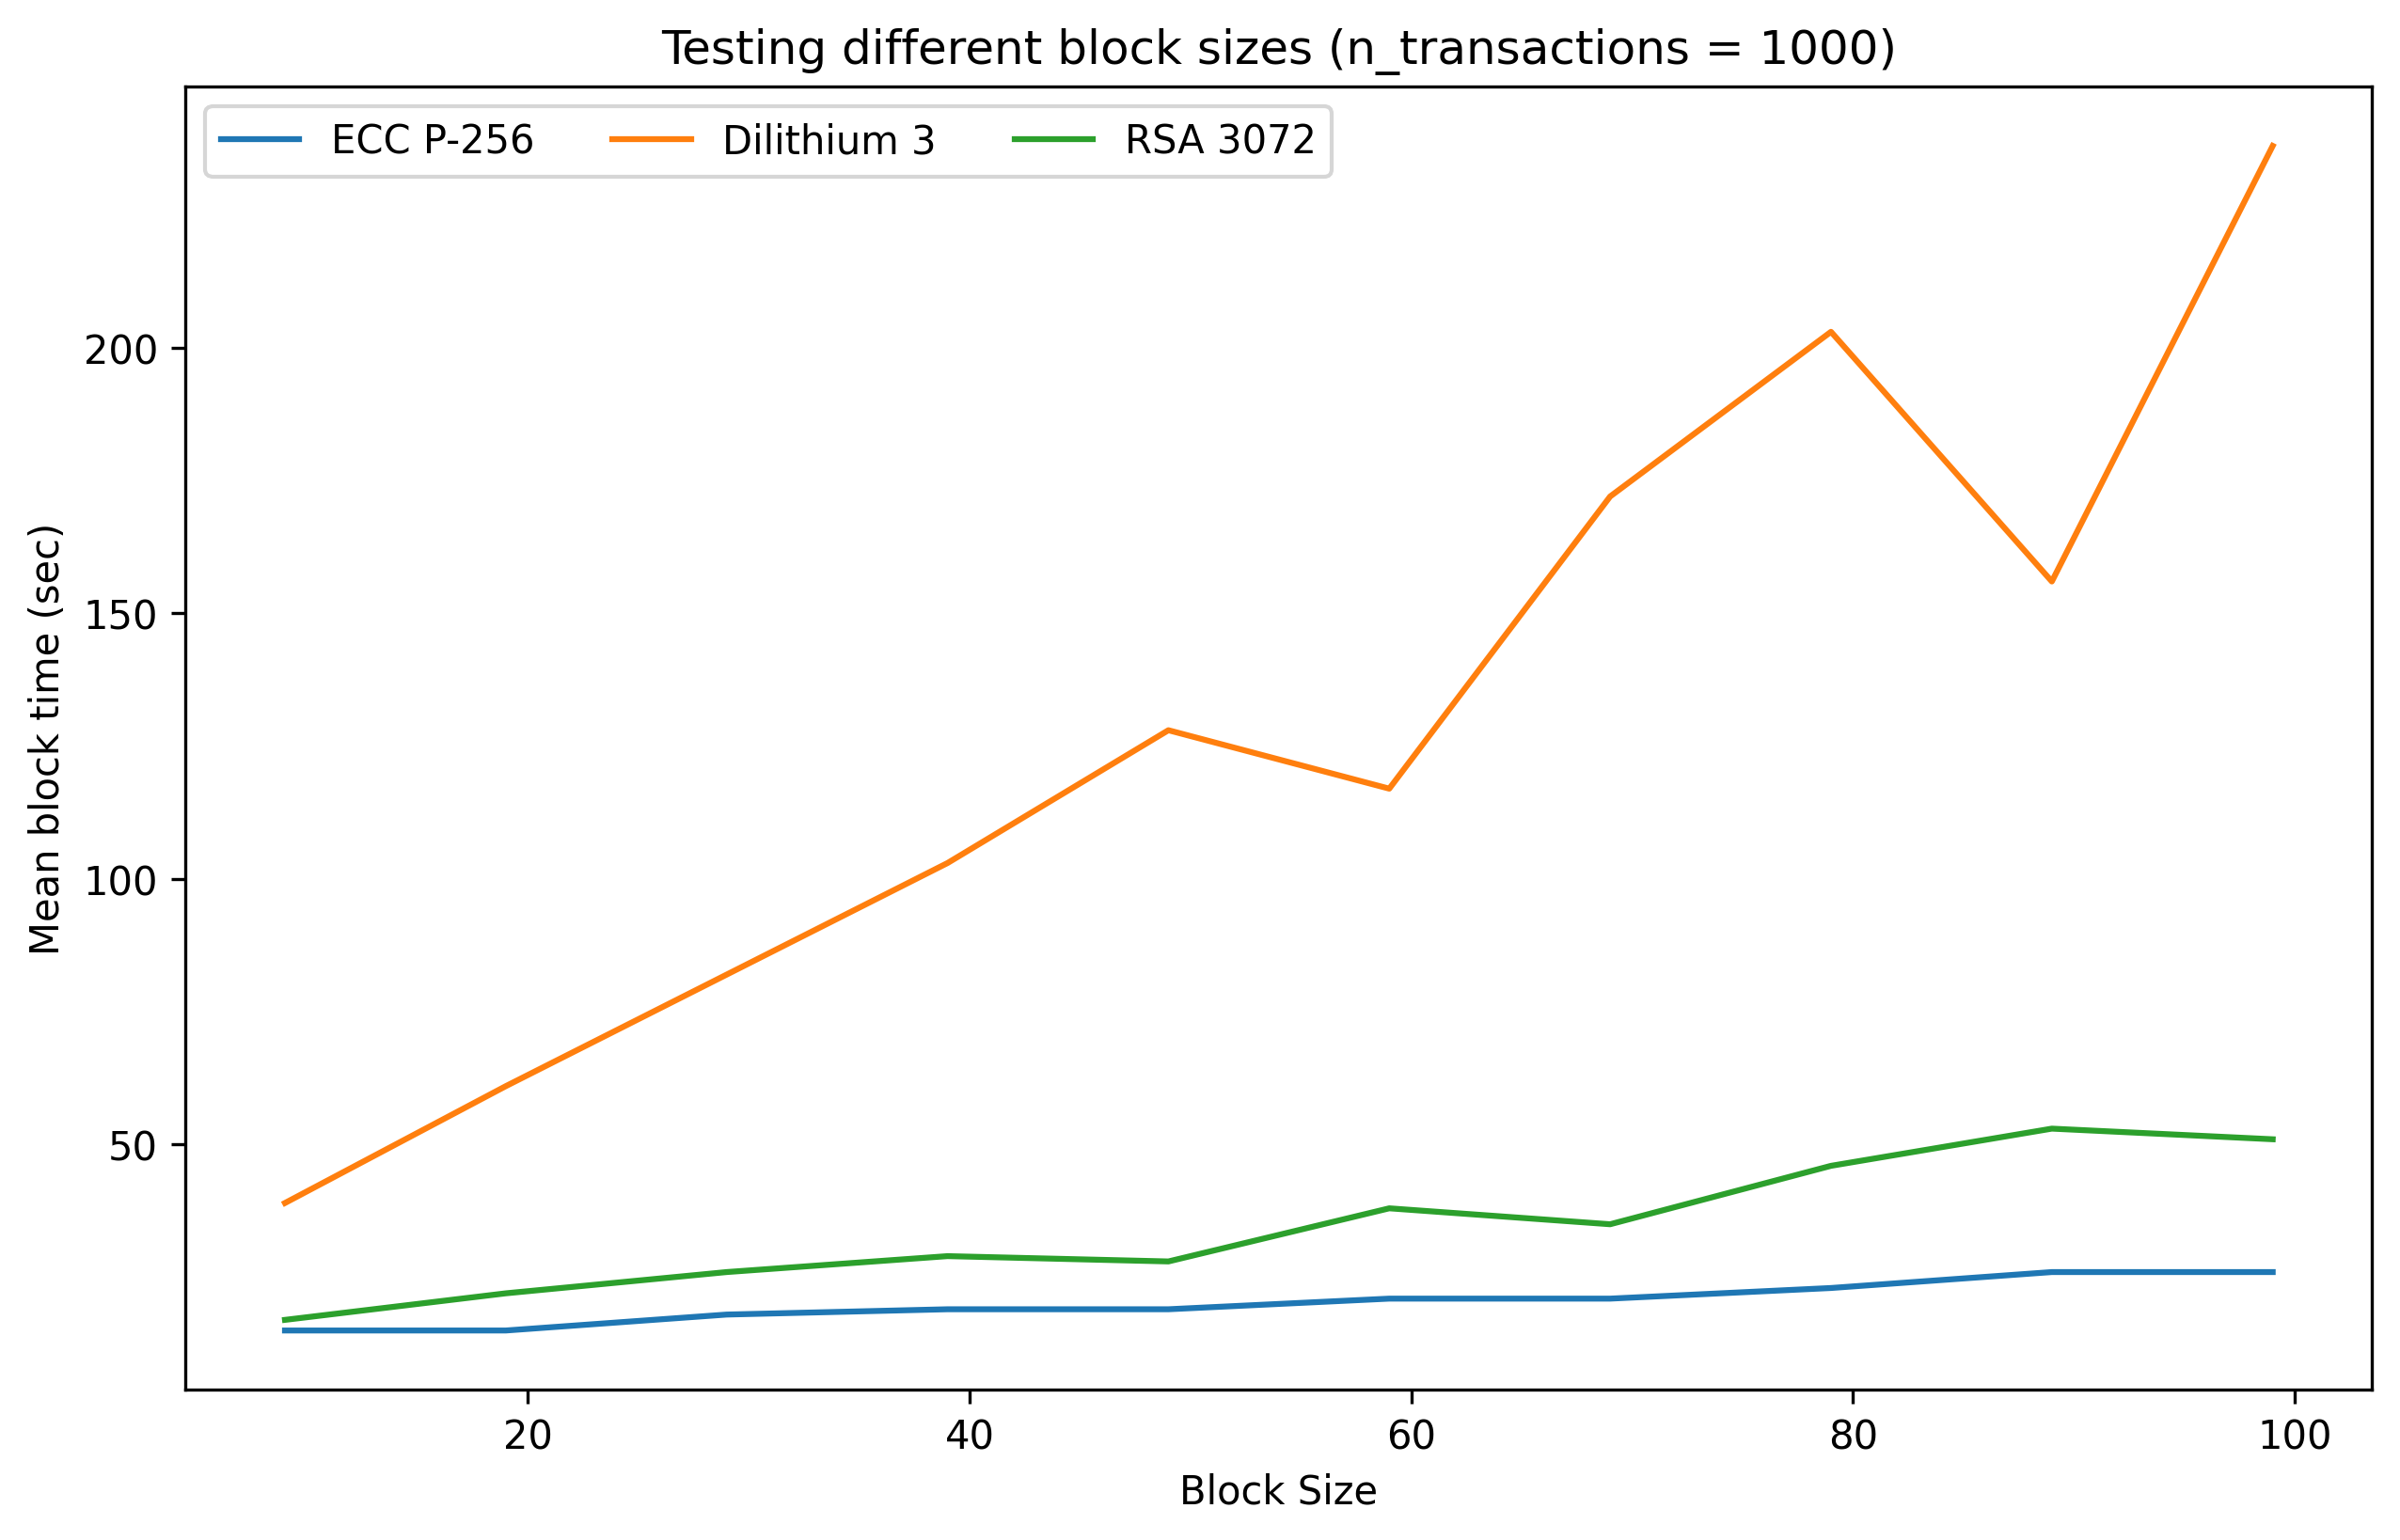

In [39]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)

for cipher, y in different_block_sizes_y2.items():
    ax.plot(different_block_sizes_x, y, label=cipher_to_name[cipher])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mean block time (sec)')
#ax.set_yscale('log')
ax.set_xlabel('Block Size')
ax.set_title('Testing different block sizes (n_transactions = 1000)')
#ax.set_xticks(x + width, different_block_sizes_x)
ax.legend(loc='upper left', ncols=4)
#ax.set_ylim(0, max(max(different_block_sizes_y.values()))+ 25000)

figname = os.path.join(os.getcwd(), "results", "different_block_sizes_block_time_line."+imageType)
plt.savefig(figname, format=imageType)

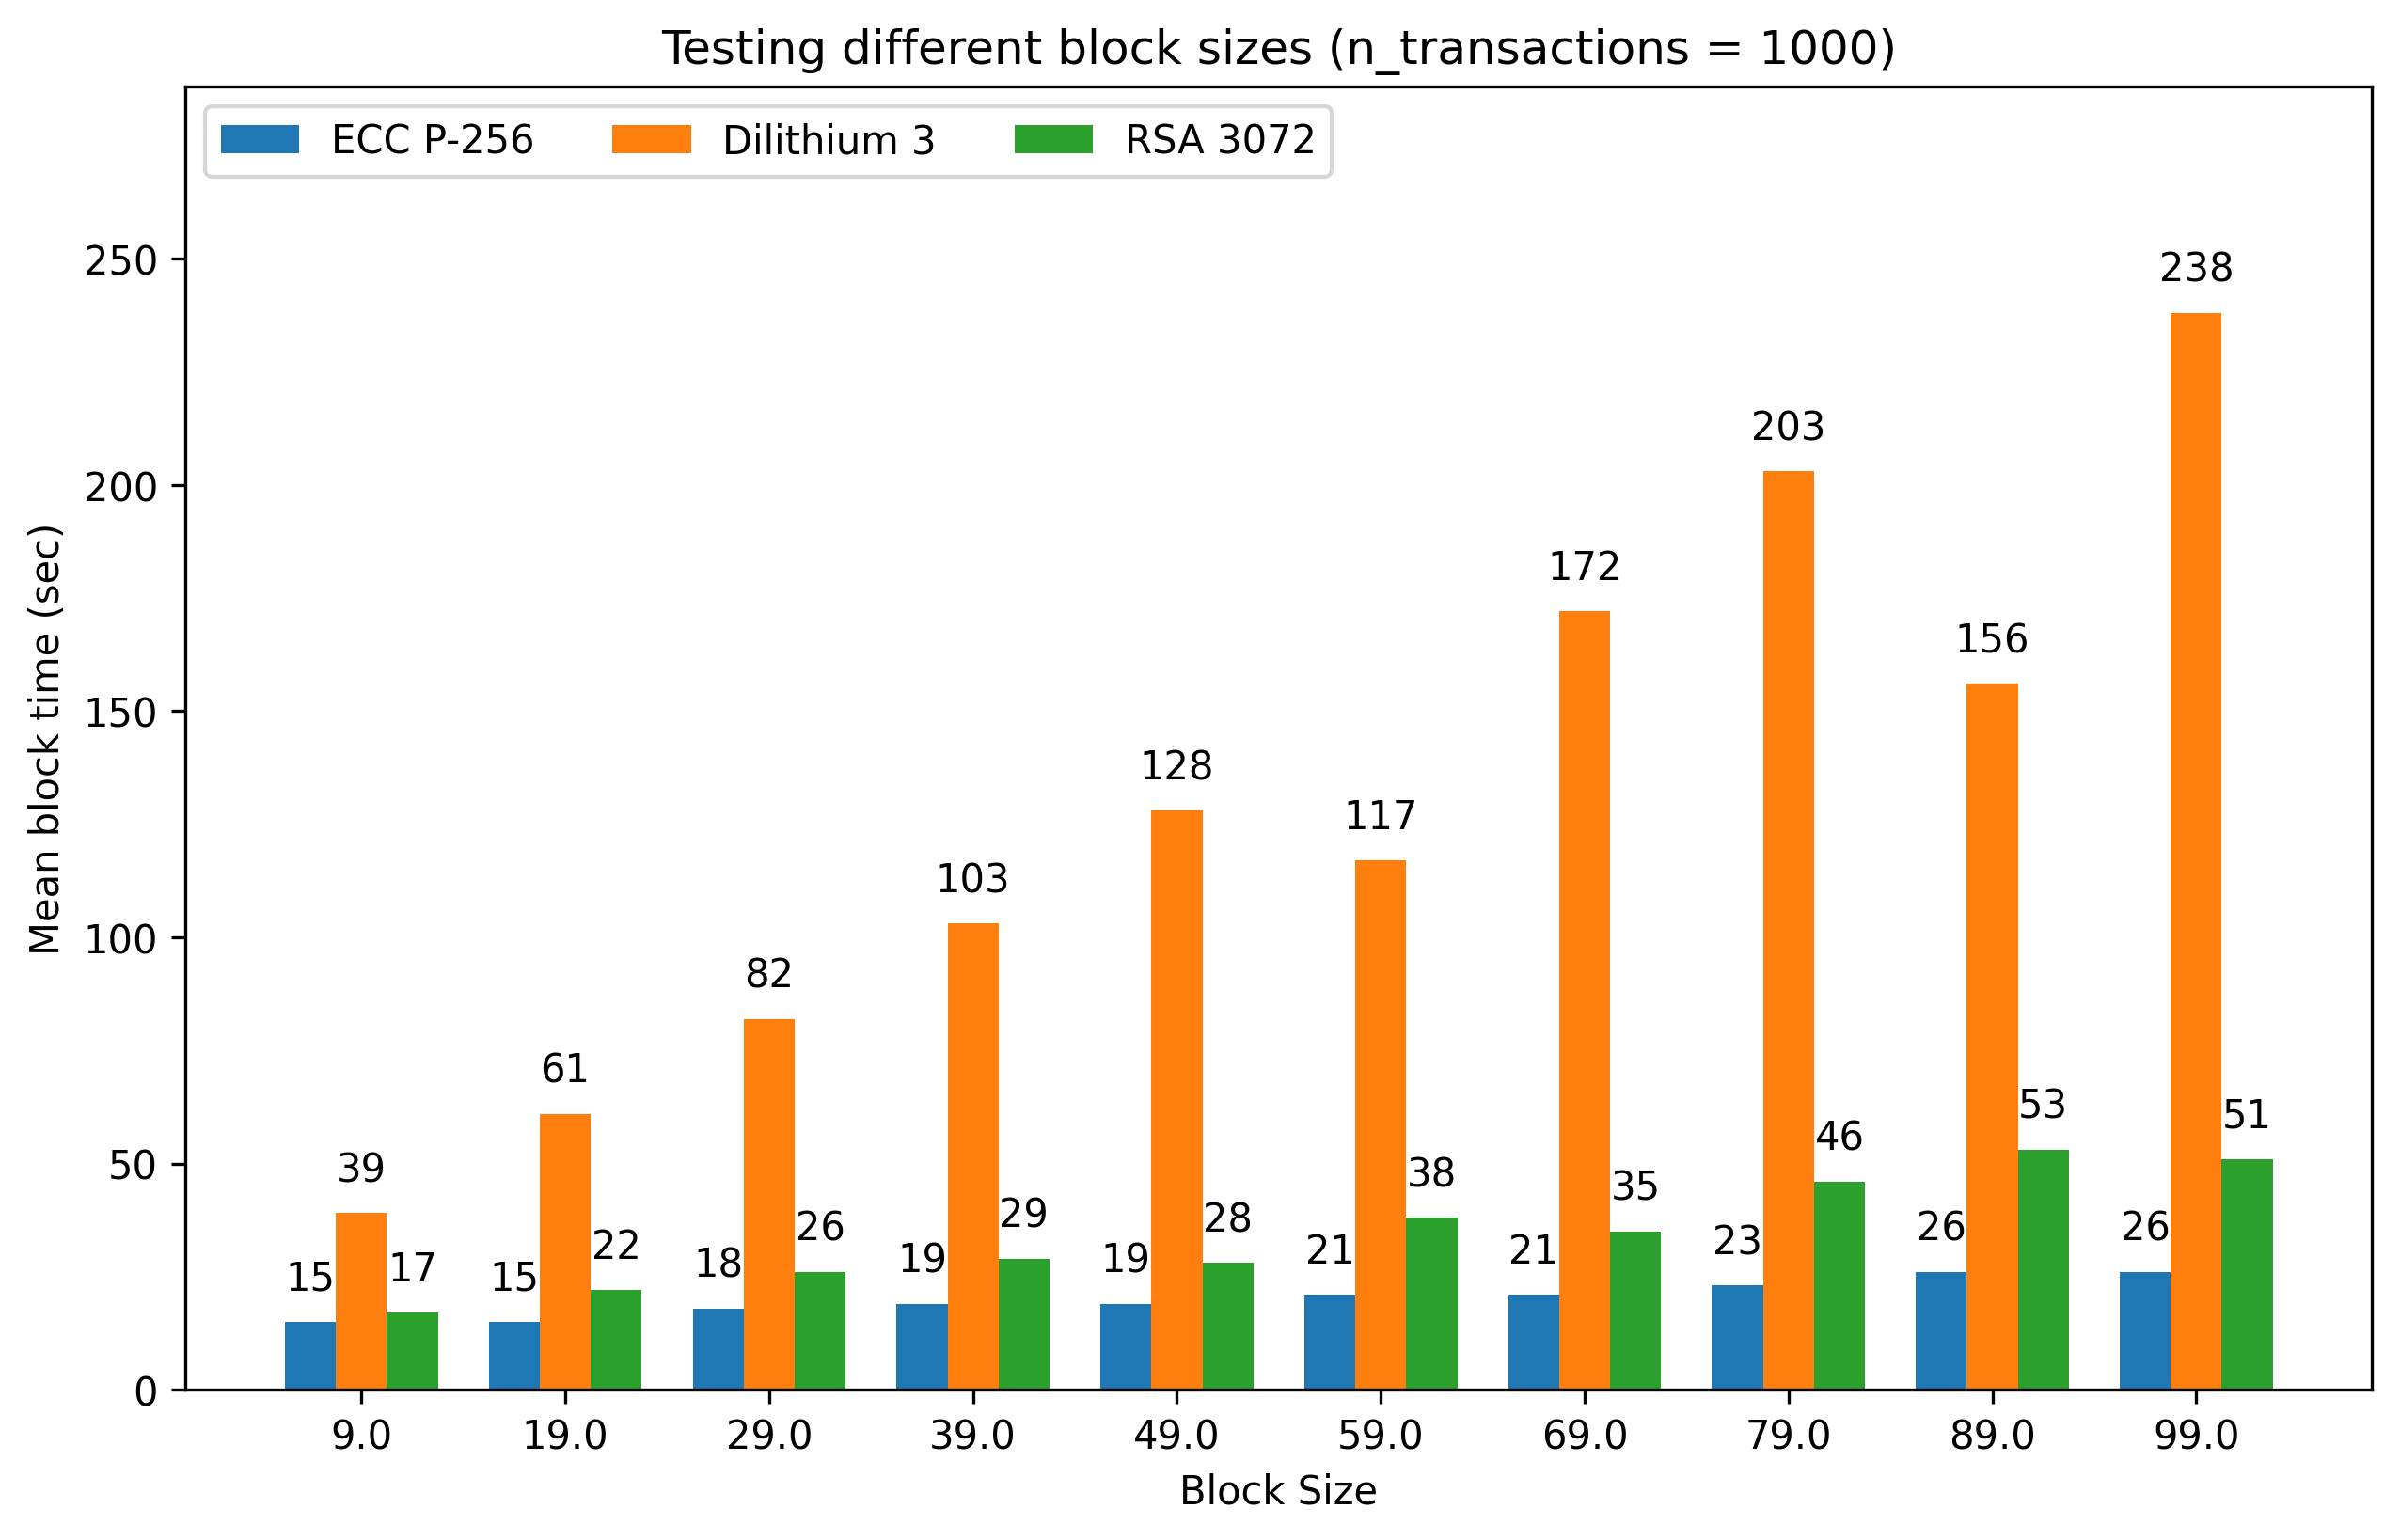

In [40]:
x = np.arange(len(different_block_sizes_x)) # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(10, 6), dpi=300)

for cipher, y in different_block_sizes_y2.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, y, width, label=cipher_to_name[cipher])
    ax.bar_label(rects, padding=6)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mean block time (sec)')
ax.set_xlabel('Block Size')
ax.set_title('Testing different block sizes (n_transactions = 1000)')
ax.set_xticks(x + width, different_block_sizes_x)
ax.legend(loc='upper left', ncols=4)
ax.set_ylim(0, max(max(different_block_sizes_y2.values())) + 50)

figname = os.path.join(os.getcwd(), "results", "different_block_sizes_block_time_bar."+imageType)
plt.savefig(figname, format=imageType)